




3 задание







Раздел 3: Проектирование процесса обработки и анализа данных

3.1 Описание процесса анализа данных
Процесс анализа данных включает следующие этапы:
Описание: Ежедневная автоматизированная загрузка данных о преступлениях из различных источников (полиция, городские службы, граждане).
Инструменты: API запросы, CSV файлы, JSON данные.
Технологии: Python (pandas, requests), SQL для управления базами данных.

In [14]:
import pandas as pd
import requests

data = pd.read_csv('crime.csv', encoding='cp1251')

3.2 Подготовка данных для анализа:

Описание: Очистка и приведение данных к единому формату, устранение дубликатов и ошибок.
Инструменты: Python (pandas для манипуляции данными), SQL для очистки данных.
Технологии: ETL (Extract, Transform, Load) процессы.

In [15]:
# Очистка данных
data.drop_duplicates(inplace=True)
data.fillna(0, inplace=True)

# Приведение данных к единому формату
data['Месяц'] = pd.to_datetime(data['Месяц'], format='%d.%m.%Y')

data.dropna(inplace=True)


3.3 Выбор методов и инструментальных средств анализа данных:

Описание: Выбор оптимальных методов для статистического анализа и визуализации данных.
Инструменты:
Метод 1: Статистический анализ с использованием Python (pandas, numpy, scipy).
Метод 2: Машинное обучение с использованием Python (scikit-learn, TensorFlow).
Обоснованный выбор:
Для статистического анализа и простых прогнозов оптимально использовать pandas и numpy, так как они позволяют быстро и эффективно проводить основные вычисления.
Для более сложного прогнозирования предпочтителен scikit-learn, так как он предоставляет богатый набор инструментов для построения моделей машинного обучения.

In [16]:
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Статистический анализ
correlation_matrix = data.corr()

# Пример построения модели машинного обучения
X = data[[' Всего_преступлений']].values
y = data[' Кражи'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 44970933.168709345


3.4 Обработка данных:

Описание: Применение выбранных методов для анализа данных, включая статистический анализ и построение прогнозных моделей.
Инструменты: Python (pandas, scikit-learn, TensorFlow, matplotlib для визуализации).
Технологии: Регрессионные модели, кластеризация, визуализация данных.

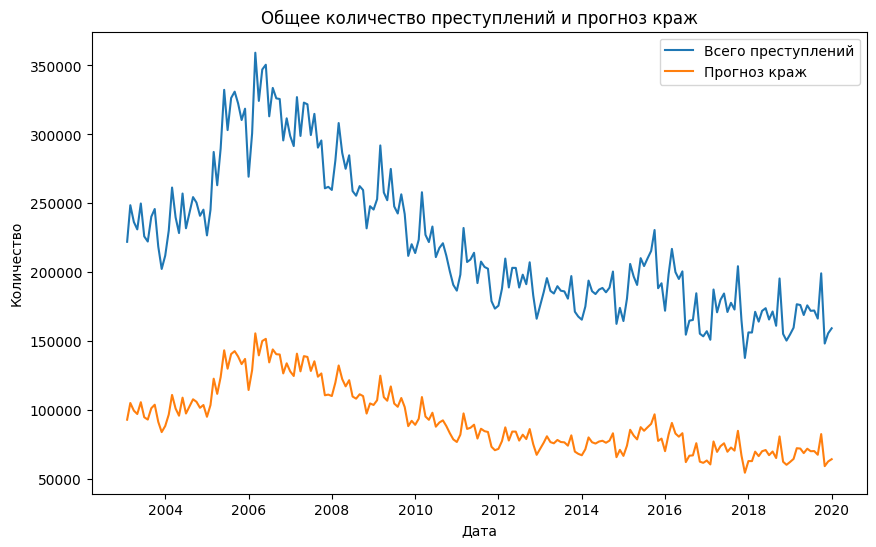

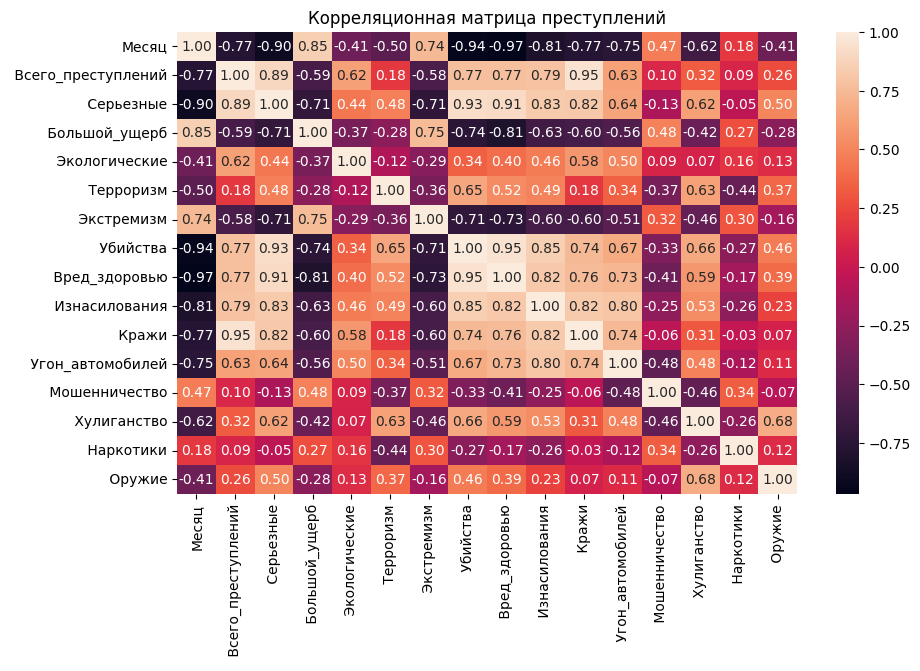

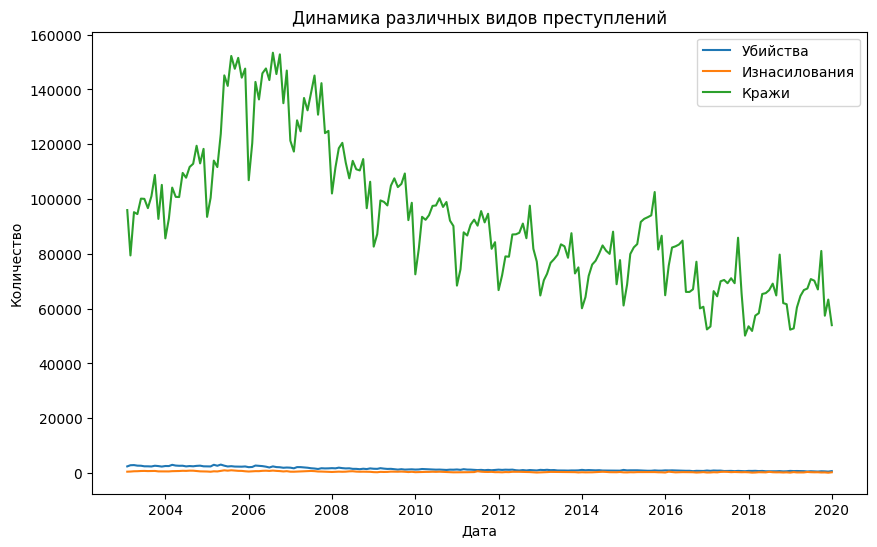

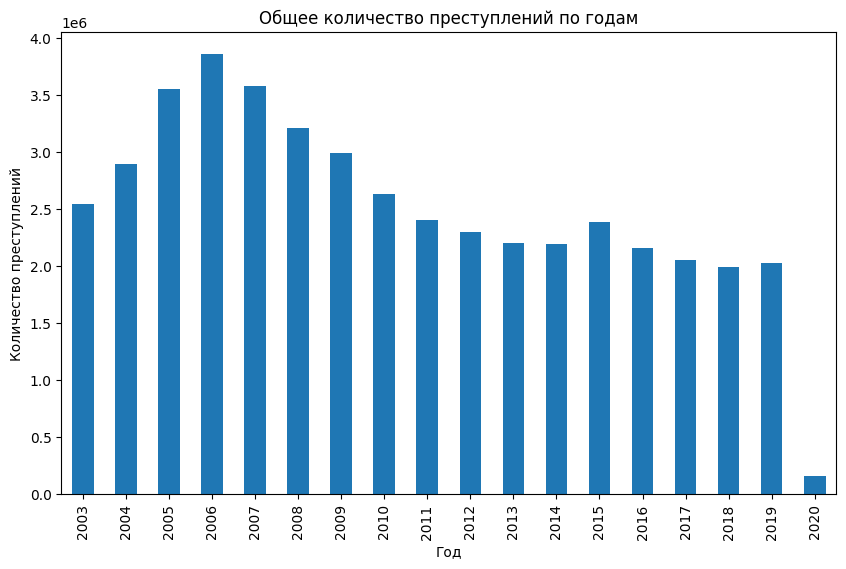

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.plot(data['Месяц'], data[' Всего_преступлений'], label='Всего преступлений')
plt.plot(data['Месяц'], model.predict(data[[' Всего_преступлений']].values), label='Прогноз краж')
plt.legend()
plt.title('Общее количество преступлений и прогноз краж')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

# Дополнительные графики
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Корреляционная матрица преступлений')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Месяц', y=' Убийства', label='Убийства')
sns.lineplot(data=data, x='Месяц', y=' Изнасилования', label='Изнасилования')
sns.lineplot(data=data, x='Месяц', y=' Кражи', label='Кражи')
plt.legend()
plt.title('Динамика различных видов преступлений')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(10, 6))
data.groupby(data['Месяц'].dt.year)[' Всего_преступлений'].sum().plot(kind='bar')
plt.title('Общее количество преступлений по годам')
plt.xlabel('Год')
plt.ylabel('Количество преступлений')
plt.show()


Вывод результатов:

Описание: Генерация отчетов, графиков и диаграмм для представления результатов анализа.
Инструменты: Python (matplotlib, seaborn), Excel, Power BI для визуализации и отчётности.
Технологии: Формирование отчетов Excel.

In [18]:
# Сохранение отчета в Excel
data.to_excel('crime_report.xlsx', index=False)


PermissionError: [Errno 13] Permission denied: 'crime_report.xlsx'

Структурная схема процесса переработки данных:

+-----------------+         +-----------------+          +-----------------+         +-----------------+         +-----------------+
| Извлечение      |         | Подготовка      |          | Выбор методов   |         | Обработка       |         |           Вывод |
| данных          | ------> | данных          | -------> | и инструментов  | ------> | данных          | ------> | результатов     |
+-----------------+         +-----------------+          +-----------------+         +-----------------+         +-----------------+
        CSV                    (Очистка, ETL)              (Методы анализа)           (Анализ и прогноз)        (Отчеты и визуализация)


3.2 Автоматизированные функции ИАД-системы

3.2.1 Задача загрузки входных данных:

Входные данные: CSV, JSON, API запросы.
Результат: Обновленная база данных.
Автоматизация: Автоматизированная загрузка данных ежедневно в 00:00.

In [ ]:
def load_data():
    data = pd.read_csv('crime.csv', encoding='cp1251')
    return data


3.2.2 Задача трансформации данных:

Входные данные: Необработанные данные из базы.
Результат: Чистые структурированные данные.
Автоматизация: Приведение данных к единому формату в течение 1 часа после загрузки.

In [ ]:
def transform_data(data):
    data.drop_duplicates(inplace=True)
    data.fillna(0, inplace=True)
    data['Месяц'] = pd.to_datetime(data['Месяц'], format='%d.%m.%Y')
    
    data.dropna(inplace=True)
    return data


3.2.3 Задача анализа данных:

Входные данные: Структурированные данные.
Результат: Аналитические отчеты, графики, диаграммы.
Автоматизация: Еженедельное автоматическое генерирование отчетов.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def analyze_data(data):
    correlation_matrix = data.corr()
    X = data[[' Всего_преступлений']].values
    y = data[' Кражи'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression().fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')
    
    # Визуализация корреляционной матрицы
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.title('Корреляционная матрица преступлений')
    plt.savefig('correlation_matrix.png')
    plt.close()
    
    # Визуализация данных
    plt.figure(figsize=(10, 6))
    plt.plot(data['Месяц'], data[' Всего_преступлений'], label='Всего преступлений')
    plt.plot(data['Месяц'], model.predict(data[[' Всего_преступлений']].values), label='Прогноз краж')
    plt.legend()
    plt.title('Общее количество преступлений и прогноз краж')
    plt.xlabel('Дата')
    plt.ylabel('Количество')
    plt.savefig('total_crimes_forecast.png')
    plt.close()

    # Дополнительные графики
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Месяц', y=' Убийства', label='Убийства')
    sns.lineplot(data=data, x='Месяц', y=' Изнасилования', label='Изнасилования')
    sns.lineplot(data=data, x='Месяц', y=' Кражи', label='Кражи')
    plt.legend()
    plt.title('Динамика различных видов преступлений')
    plt.xlabel('Дата')
    plt.ylabel('Количество')
    plt.savefig('crime_types_trends.png')
    plt.close()

    plt.figure(figsize=(10, 6))
    data.groupby(data['Месяц'].dt.year)[' Всего_преступлений'].sum().plot(kind='bar')
    plt.title('Общее количество преступлений по годам')
    plt.xlabel('Год')
    plt.ylabel('Количество преступлений')
    plt.savefig('total_crimes_by_year.png')
    plt.close()

    return correlation_matrix, model.predict(X)
correlation_matrix, predictions = analyze_data(data)

Mean Squared Error: 44970933.168709345


3.2.4 Задача прогнозирования преступлений:

Входные данные: Исторические данные, текущие данные.
Результат: Прогнозные модели, вероятностные карты.
Автоматизация: Ежедневное обновление прогнозов.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def forecast_crimes(data):
    X = data[[' Всего_преступлений']].values
    y = data[' Кражи'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression().fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    # Прогноз на основе всей доступной информации
    full_predictions = model.predict(X)
    return full_predictions


3.2.5 Задача поддержки принятия решений:

In [21]:
import matplotlib.pyplot as plt

def generate_reports(data, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Месяц'], data[' Всего_преступлений'], label='Всего преступлений')
    plt.plot(data['Месяц'], predictions, label='Прогноз краж')
    plt.legend()
    plt.savefig('crime_trends.png')
    plt.show()
    data.to_excel('crime_report.xlsx', index=False)


Функционально-структурная схема ИАД-системы:

+-------------------+        +--------------------+         +--------------------+         +-----------------------+         +--------------------------+
| Загрузка данных   | -----> | Трансформация      | ----->  | Анализ данных      | ----->  | Прогнозирование       | ----->  | Поддержка принятия       |
|       CSV         |        | данных             |         |                    |         | преступлений          |         | решений                  |
+-------------------+        +--------------------+         +--------------------+         +-----------------------+         +--------------------------+
 (входные данные)            (очистка, ETL)                   (статистический               (машинное обучение)                (оперативные отчеты,           
                                                             анализ, визуализация)                                                   рекомендации)            


Выводы по дальнейшей практической реализации проекта
Автоматизация процессов значительно снизит трудозатраты и повысит точность данных.
Использование машинного обучения позволит более точно прогнозировать криминогенную ситуацию и своевременно реагировать на изменения.
Визуализация данных улучшит представление результатов анализа и поможет в принятии обоснованных решений.
Разработка интерфейса для взаимодействия с системой должна учитывать пользователей с различным уровнем технической подготовки.
Масштабируемость системы обеспечит возможность увеличения объема данных и количества пользователей без потери производительности.
Интеграция с внешними системами и базами данных повысит оперативность и качество данных.
Эти шаги позволят организации значительно улучшить мониторинг и анализ преступной деятельности, что в свою очередь повысит безопасность граждан.